## Prepare Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Read in the CSV file
df = pd.read_csv('D:\salam\Midterm_53_group.csv')

# Display the number of unique values in the "protocol" column and their frequencies
protocol_counts = df['Protocol'].value_counts()
print(protocol_counts)

# Get the top 2 protocols
top_protocols = protocol_counts.nlargest(2).index

# Filter the DataFrame to include only rows with the top 2 protocols
df_filtered = df[df['Protocol'].isin(top_protocols)]

# Apply one-hot encoding to the 'Protocol' column
encoder = OneHotEncoder(sparse_output=False)
protocol_encoded = encoder.fit_transform(df_filtered[['Protocol']])

print(protocol_encoded)
df_filtered.columns

Protocol
TCP        314873
TLSv1.3     71625
ICMP         2690
DNS          1999
TLSv1.2      1763
ARP           447
OCSP          258
NBNS          231
RARP          178
TLSv1          20
DHCP           17
SSLv2          11
ICMPv6          9
BROWSER         8
STUN            4
HTTP            3
Name: count, dtype: int64
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Index(['Time', 'Source', 'No.', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')

In [2]:

# Columns to drop
columns_to_drop = ['No.', 'Source', 'Info','Time', 'Destination']

# Drop the specified columns from the filtered DataFrame
df_top_dropped = df_filtered.drop(columns=columns_to_drop, axis=1)

# Print the columns of the updated DataFrame to verify
print(df_top_dropped.columns)


Index(['Protocol', 'Length'], dtype='object')


In [3]:
print(df_filtered.columns)


Index(['Time', 'Source', 'No.', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')


## Decision Tree

Train Accuracy: 0.9460410481309711
Test Accuracy: 0.947490297542044
              precision    recall  f1-score   support

         TCP       0.95      0.99      0.97     63023
     TLSv1.3       0.96      0.75      0.84     14277

    accuracy                           0.95     77300
   macro avg       0.95      0.87      0.90     77300
weighted avg       0.95      0.95      0.94     77300



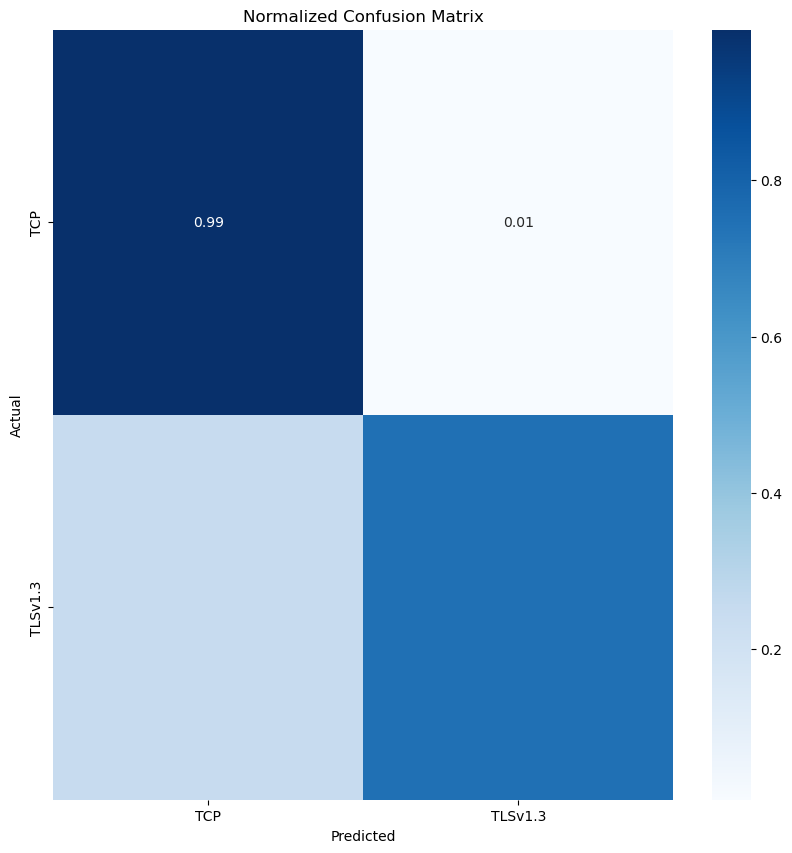

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Encode the target variable 'application_name'
le = LabelEncoder()
df_top_dropped['protocol_encoded'] = le.fit_transform(df_top_dropped['Protocol'])

# Define the features and the target
X = df_top_dropped.drop(['Protocol', 'protocol_encoded'], axis=1)
y = df_top_dropped['protocol_encoded']

# Split the dataset into training and testing sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the training set and the test set
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Calculate accuracy on the training set and the test set
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print out accuracy scores
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# Print classification report for test set
print(classification_report(y_test, test_predictions, target_names=le.classes_))

# Plotting the normalized confusion matrix
# Compute the confusion matrix
cm = confusion_matrix(y_test, test_predictions, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()

## Random Forest

Train Accuracy: 0.9460378139573995
Test Accuracy: 0.9477490297542044
              precision    recall  f1-score   support

         TCP       0.95      0.99      0.97     63023
     TLSv1.3       0.96      0.75      0.84     14277

    accuracy                           0.95     77300
   macro avg       0.95      0.87      0.90     77300
weighted avg       0.95      0.95      0.95     77300



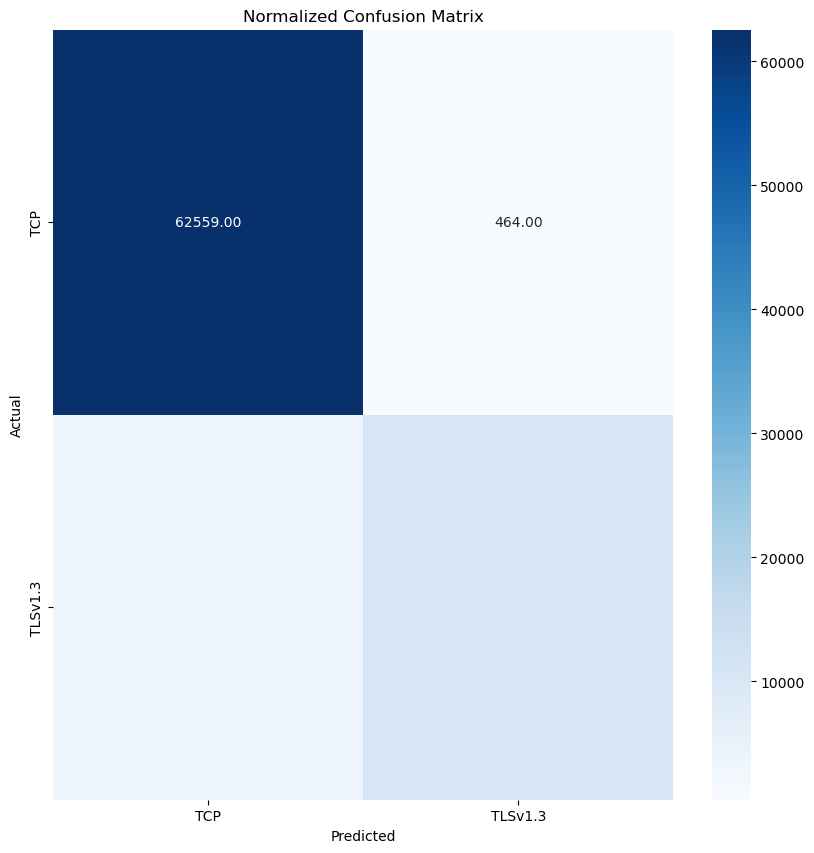

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Encode the target variable 'application_name'
le = LabelEncoder()
df_top_dropped['protocol_encoded'] = le.fit_transform(df_top_dropped['Protocol'])

# Define the features and the target
X = df_top_dropped.drop(['Protocol', 'protocol_encoded'], axis=1)
y = df_top_dropped['protocol_encoded']

# Split the dataset into training and testing sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the train set
train_predictions_rf = rf_clf.predict(X_train)
# Calculate accuracy on the train set
train_accuracy = accuracy_score(y_train, train_predictions_rf)

# Print out accuracy score
print(f'Train Accuracy: {train_accuracy}')

# Make predictions on the test set
test_predictions = rf_clf.predict(X_test)
# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

# Print out accuracy score
print(f'Test Accuracy: {test_accuracy}')

# Print classification report for test set
report = classification_report(y_test, test_predictions, target_names=le.classes_, output_dict=True)
print(classification_report(y_test, test_predictions, target_names=le.classes_))

# Calculate confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()



## Naive Bayes

Train Accuracy: 0.8062438954973835
Test Accuracy: 0.806248382923674
              precision    recall  f1-score   support

         TCP       0.82      0.99      0.89     63023
     TLSv1.3       0.18      0.01      0.03     14277

    accuracy                           0.81     77300
   macro avg       0.50      0.50      0.46     77300
weighted avg       0.70      0.81      0.73     77300



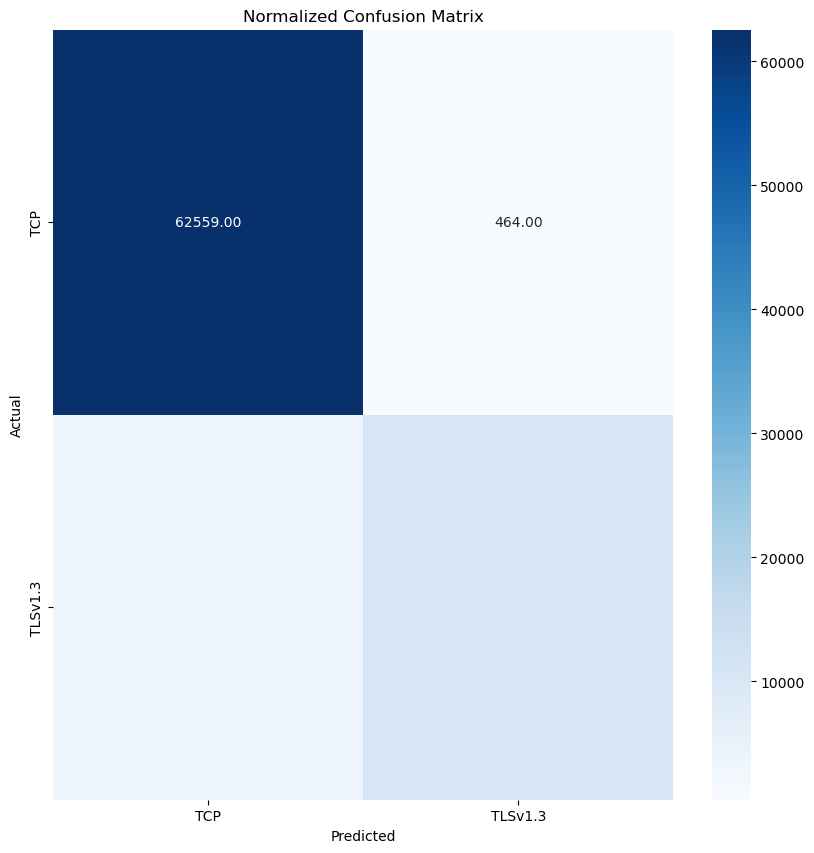

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the DataFrame is already loaded and preprocessed as df_top_applications_dropped

# Encode the target variable 'application_name'
le = LabelEncoder()
df_top_dropped['protocol_encoded'] = le.fit_transform(df_top_dropped['Protocol'])

# Define the features and the target
X = df_top_dropped.drop(['Protocol', 'protocol_encoded'], axis=1)
y = df_top_dropped['protocol_encoded']

# Split the dataset into training and testing sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Naive Bayes Classifier
nb_clf = GaussianNB()

# Train the model on the training data
nb_clf.fit(X_train, y_train)

# Make predictions on the train set
train_predictions = nb_clf.predict(X_train)
# Calculate accuracy on the train set
train_accuracy = accuracy_score(y_train, train_predictions)

# Print out accuracy score
print(f'Train Accuracy: {train_accuracy}')

# Make predictions on the test set
test_predictions = nb_clf.predict(X_test)
# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

# Print out accuracy score
print(f'Test Accuracy: {test_accuracy}')

# Print classification report for test set
print(classification_report(y_test, test_predictions, target_names=le.classes_))

# Plotting the normalized confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()
